In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, log_loss
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('dataset.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.8

# Gerando w's diferentes para GroundLivingArea 
groundLivingArea2 = df['GroundLivingArea'] ** 2
groundLivingArea3 = df['GroundLivingArea'] ** 3
groundLivingArea5 = df['GroundLivingArea'] ** 5
groundLivingArea10 = df['GroundLivingArea'] ** 10

df['GroundLivingArea2'] = groundLivingArea2
df['GroundLivingArea3'] = groundLivingArea3
df['GroundLivingArea5'] = groundLivingArea5
df['GroundLivingArea10'] = groundLivingArea10

# Gerando w's diferentes para BasementArea 
basementArea2 = df['BasementArea'] ** 2
basementArea3 = df['BasementArea'] ** 3
basementArea5 = df['BasementArea'] ** 5
basementArea10 = df['BasementArea'] ** 10

df['BasementArea2'] = basementArea2
df['BasementArea3'] = basementArea3
df['BasementArea5'] = basementArea5
df['BasementArea10'] = basementArea10

train = df[msk]
test = df[~msk]

# Questão 1
# 1) Resposta: O Método dos Mínimos Quadrados (MMQ), ou Mínimos Quadrados Ordinários (MQO) ou OLS (do inglês Ordinary Least Squares) é uma técnica de otimização matemática que procura encontrar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados (tais diferenças são chamadas resíduos). Ela consiste em um estimador que minimiza a soma dos quadrados dos resíduos da regressão, de forma a maximizar o grau de ajuste do modelo aos dados observados. Um requisito para o método dos mínimos quadrados é que o fator imprevisível (erro) seja distribuído aleatoriamente e essa distribuição seja normal. O Teorema Gauss-Markov garante (embora indiretamente) que o estimador de mínimos quadrados é o estimador não-enviesado de mínima variância linear na variável resposta. O livro de Murphy (2012) explica a derivação em detalhes, expressa pela fórmula: wOLS = (XT * X) − 1XT * y.

# 1. 2. a) Gerar matrizes com base na variável GroundLivingArea. Para cada, plotar as linhas separando os dados, calcular o NLL. Testar o NLL mais baixo com os dados reais.

Coefficients:  [0.89314952]
Mean squared error: 0.07
Coefficient of determination: 0.51
Coefficients:  [0.0614765]
Mean squared error: 0.07
Coefficient of determination: 0.51
Coefficients:  [0.00562032]
Mean squared error: 0.07
Coefficient of determination: 0.52
Coefficients:  [6.26863536e-05]
Mean squared error: 0.07
Coefficient of determination: 0.52
Coefficients:  [1.37997916e-09]
Mean squared error: 0.07
Coefficient of determination: 0.50


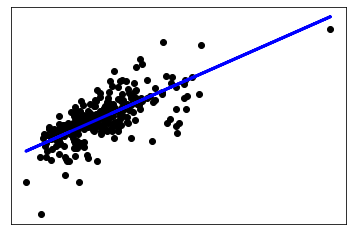

In [8]:
groundLivingMatrixes = ['GroundLivingArea', 'GroundLivingArea2', 'GroundLivingArea3', 'GroundLivingArea5', 'GroundLivingArea10']

for matrixItem in groundLivingMatrixes:
    regr = linear_model.LinearRegression()

    # Treinando o modelo
    regr.fit(train[matrixItem].to_numpy().reshape(-1, 1), train['SalePrice'])

    # Realizando predições com os dados de teste
    salesPrice_pred = regr.predict(test[matrixItem].to_numpy().reshape(-1, 1))

    # Coeficientes
    print("Coefficients: ", regr.coef_)
    # Mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(test['SalePrice'], salesPrice_pred))
    # Coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(test['SalePrice'], salesPrice_pred))
    # print("Log loss: ".format(log_loss(test['SalePrice'], salesPrice_pred)))

    # Plot dos gráficos
    plt.clf()
    plt.scatter(test[matrixItem], test['SalePrice'], color="black")
    plt.plot(test[matrixItem], salesPrice_pred, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

# 1. 2. b) Gerar matrizes com base na variável BasementArea. Para cada, plotar as linhas separando os dados, calcular o NLL. Testar o NLL mais baixo com os dados reais.

Coefficients:  [0.70358316]
Mean squared error: 0.10
Coefficient of determination: 0.28
Coefficients:  [0.05181327]
Mean squared error: 0.10
Coefficient of determination: 0.29
Coefficients:  [0.00503859]
Mean squared error: 0.10
Coefficient of determination: 0.30
Coefficients:  [6.28499527e-05]
Mean squared error: 0.10
Coefficient of determination: 0.32
Coefficients:  [1.76584803e-09]
Mean squared error: 0.09
Coefficient of determination: 0.35


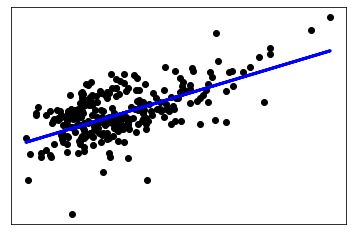

In [9]:
basementAreaMatrixes = ['BasementArea', 'BasementArea2', 'BasementArea3', 'BasementArea5', 'BasementArea10']

for matrixItem in basementAreaMatrixes:
    regr = linear_model.LinearRegression()

    # Treinando o modelo
    regr.fit(train[matrixItem].to_numpy().reshape(-1, 1), train['SalePrice'])

    # Realizando predições com os dados de teste
    salesPrice_pred = regr.predict(test[matrixItem].to_numpy().reshape(-1, 1))

    # Coeficientes
    print("Coefficients: ", regr.coef_)
    # Mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(test['SalePrice'], salesPrice_pred))
    # Coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(test['SalePrice'], salesPrice_pred))
    # print("Log loss: ".format(log_loss(test['SalePrice'], salesPrice_pred)))

    # Plot dos gráficos
    plt.clf()
    plt.scatter(test[matrixItem], test['SalePrice'], color="black")
    plt.plot(test[matrixItem], salesPrice_pred, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

# 1. 2. c) Comparar as predições dos exercícios acima.

# Resposta: Apesar da baixa assertividade, escolheria o primeiro modelo por possuir menos erros com os dados utilizados.

# 1. 2. d) Executar regressão linear com GroudLivingArea e BasementArea.

In [10]:
regr = linear_model.LinearRegression()

# Treinando o modelo
regr.fit(train[['GroundLivingArea', 'BasementArea']], train['SalePrice'])

# Realizando predições com os dados de teste
salesPrice_pred = regr.predict(test[['GroundLivingArea', 'BasementArea']])

# Coeficientes
print("Coefficients: ", regr.coef_)
# Mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test['SalePrice'], salesPrice_pred))
# Coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test['SalePrice'], salesPrice_pred))
# print("Log loss: ".format(log_loss(test['SalePrice'], salesPrice_pred)))

# 1. 2. e) Aplicar o modelo para GroudLivingArea = 8 e BasementArea = 7.5.

X_predict = [[8, 7.5]]  # put the dates of which you want to predict kwh here
y_predict = regr.predict(X_predict)
print("Preço do imóvel contendo GroudLivingArea = 8 e BasementArea = 7.5: {}".format(y_predict))

Coefficients:  [0.69860517 0.42660011]
Mean squared error: 0.05
Coefficient of determination: 0.61
Preço do imóvel contendo GroudLivingArea = 8 e BasementArea = 7.5: [12.79173933]


# 2. 1 e 2) Resposta: